In [1]:
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-24xa81ho
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-24xa81ho
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [6]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Class variable
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [7]:
from pycaret.classification import *

clf = setup(
    data=data,
    target='Class variable',
    session_id=123,
    normalize=True,
    use_gpu=True,
    fold=5
)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

In [8]:
best = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7652,0.8004,0.5555,0.7121,0.6232,0.4562,0.4644,0.0280
lr,Logistic Regression,0.7633,0.8002,0.5447,0.7128,0.6166,0.4496,0.4589,0.4500
rf,Random Forest Classifier,0.7448,0.7917,0.5128,0.6757,0.5799,0.4027,0.4121,1.3120
nb,Naive Bayes,0.7392,0.7852,0.5605,0.6435,0.5971,0.4062,0.4096,0.0280
gbc,Gradient Boosting Classifier,0.7336,0.7878,0.5502,0.6402,0.5899,0.3945,0.3983,0.1780
ada,Ada Boost Classifier,0.7298,0.7781,0.5339,0.6404,0.5801,0.3835,0.3884,0.1180
et,Extra Trees Classifier,0.7281,0.7782,0.5017,0.6396,0.5592,0.3677,0.3750,0.1940
qda,Quadratic Discriminant Analysis,0.7244,0.7805,0.5289,0.6222,0.5700,0.3697,0.3733,0.0280
lightgbm,Light Gradient Boosting Machine,0.7095,0.7690,0.5238,0.5936,0.5545,0.3409,0.3435,1.3820
knn,K Neighbors Classifier,0.7039,0.7402,0.5020,0.5927,0.5388,0.3241,0.3295,0.2320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [9]:
evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

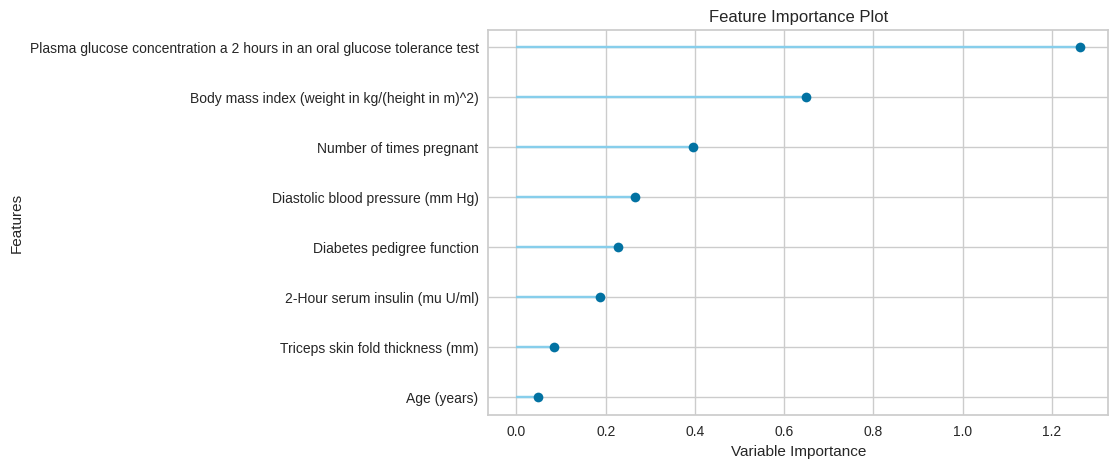

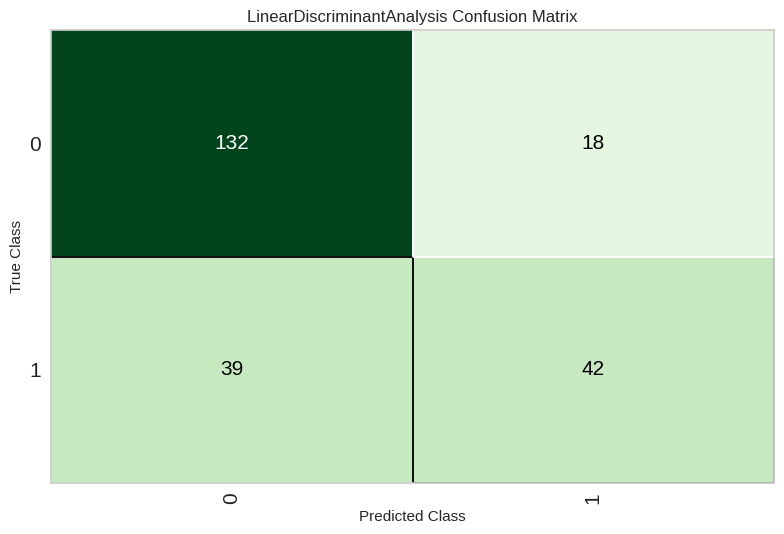

In [10]:
plot_model(best, plot = 'feature')
plot_model(best, plot = 'confusion_matrix')

In [11]:
tuned = tune_model(best)
final = finalize_model(tuned)
final


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8241,0.8485,0.6316,0.8276,0.7164,0.5922,0.6036
1,0.7963,0.8466,0.6053,0.7667,0.6765,0.5308,0.5387
2,0.7850,0.8000,0.5676,0.7500,0.6462,0.4960,0.5059
3,0.7290,0.8031,0.4595,0.6538,0.5397,0.3558,0.3669
4,0.7196,0.7000,0.5135,0.6129,0.5588,0.3557,0.3587
Mean,0.7708,0.7996,0.5555,0.7222,0.6275,0.4661,0.4748
Std,0.0401,0.0539,0.0623,0.0781,0.0679,0.0952,0.0967


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body mass index (weight in '
                                             'kg/(height in m)^2)',
                                             'Diabetes pedigre...
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 LinearDiscriminantAnalysis(covariance_estimator=None,
                                            n_components=None, priors=None,
                                            shrinkage='auto', solver='lsqr',
                                            store_covariance=False,
                                            tol=0.0001))],
         verbose=False)

In [12]:
predictions = predict_model(final)
predictions.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7749,0.8714,0.5802,0.7231,0.6438,0.4822,0.4884


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.7298
438,1,97,70,15,0,18.200001,0.147,21,0,0,0.9757
149,2,90,70,17,0,27.299999,0.085,22,0,0,0.9594
373,2,105,58,40,94,34.900002,0.225,25,0,0,0.8505
36,11,138,76,0,0,33.200001,0.420,35,0,1,0.6495


In [13]:
save_model(final, 'binary_best')



Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                                     transformer=StandardScaler(copy=True,
                                             